# Chapter Six - Data Processing with Optimus 

## Why Optimus exist? 

Create Optimus with pandas as engine

In [1]:
%load_ext autoreload
%autoreload 2

### How fingerprint works

In [2]:
string= "Optimus"


In [3]:
import sys
sys.path.append("../../Optimus")

In [23]:
from optimus import Optimus
from optimus.expressions import parse

engine = "dask"
op = Optimus(engine)
df = op.load.file("../../Optimus/examples/data/store-demo.csv", n_rows=50000).execute()
# df = df.repartition(8).execute()
# df = df.cols.fill_na(["discount"], "0", output_cols="discount")
# df = df.cols.set("new_column", value=parse('price - price*(discount*0.01)'), eval_value=True)

In [5]:
df

id 1 (int64) not nullable,transaction_date 2 (object) not nullable,name 3 (object) not nullable,code 4 (object) not nullable,price 5 (float64) not nullable,discount 6 (object) not nullable,color 7 (object) not nullable
1,8/1/2017,shírt,Sg31,237.99,5,white
2,6/1/2018,pants,Rt63,37.99,0%,black
3,9/1/2018,shirt,Fg68,15.0,0,white
4,9/1/2017,PANTS,Rg35,143.47,0,black
5,2/1/2017,Pants,RT27,275.0,15,black
6,5/1/2017,PANTS,Rt21,140.0,0%,black/grey
7,6/1/2017,shírt,RG10,225.0,15%,yellow
8,9/1/2016,shoes,fg83,277.99,0,black
9,11/1/2015,PANTS,ST01,199.99,0,black/white
10,11/1/2016,shírt,Ft41,210.0,0,white


In [6]:
op.client

Client Scheduler: inproc://192.168.100.4/25264/1 Dashboard: http://192.168.100.4:8787/status,Cluster Workers: 1 Cores: 8 Memory: 4.00 GB


Wall time: 638 ms


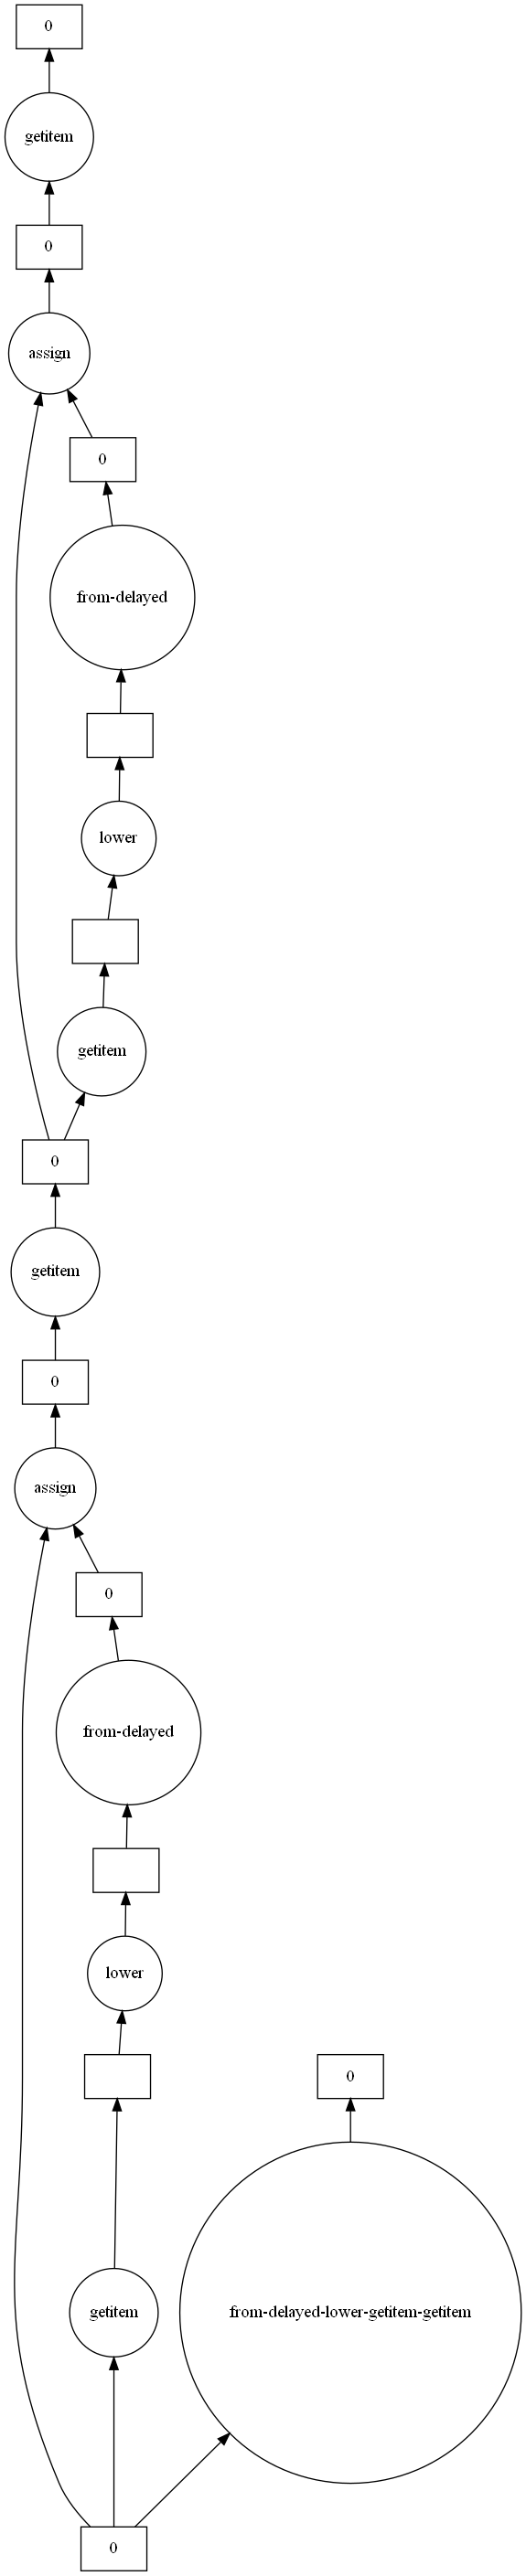

In [24]:
%%time
df.cols.lower(["id"]).cols.lower("name").data.visualize()



In [ ]:
%%time
# from dask import to_delayed
import dask
dask.compute(df.data["id"].str.lower(),df.data["transaction_date"].str.lower(), df.data["name"].str.lower())


In [9]:
%%time
df.cols.lower(["id","transaction_date","name"]).head()

Wall time: 359 ms


,id,transaction_date,name,code,price,discount,color
0,1,8/1/2017,shírt,Sg31,237.99,5,white
1,2,6/1/2018,pants,Rt63,37.99,0%,black
2,3,9/1/2018,shirt,Fg68,15,0,white
3,4,9/1/2017,pants,Rg35,143.47,0,black
4,5,2/1/2017,pants,RT27,275,15,black
5,6,5/1/2017,pants,Rt21,140,0%,black/grey
6,7,6/1/2017,shírt,RG10,225,15%,yellow
7,8,9/1/2016,shoes,fg83,277.99,0,black
8,9,11/1/2015,pants,ST01,199.99,0,black/white
9,10,11/1/2016,shírt,Ft41,210,0,white


In [72]:
df

Dask Series Structure:
npartitions=1
    object
       ...
Name: id, dtype: object
Dask Name: str-lower, 3 tasks

In [73]:
for col_name in ["id","name"]:
    df[col_name] = df.data[col_name].str.lower()

TypeError: _assign() missing 1 required positional argument: 'assign'

In [46]:
df.cols.names()

['id', 'transaction_date', 'name', 'code', 'price', 'discount', 'color']

In [34]:
op.client

Client Scheduler: inproc://192.168.100.4/34604/1 Dashboard: http://192.168.100.4:8787/status,Cluster Workers: 1 Cores: 8 Memory: 4.00 GB


In [74]:
df.cols.lower()

TypeError: _assign() missing 1 required positional argument: 'assign'

In [70]:
%%time
def l(df, col_name):
    return df[col_name].str.lower()
#     return df.assign(**{col_name:df[col_name].str.lower()})

# dask.delayed(df.data.assign(**{c:l(df.data, c) for c in ['id', 'transaction_date', 'name', 'code', 'price', 'discount', 'color']})).compute()
dask.delayed(l(df.data, c) for c in ['id', 'transaction_date', 'name', 'code', 'price', 'discount', 'color']).compute()

Wall time: 453 ms


In [13]:
a.compute()

[          id transaction_date   name  code   price discount        color
 0          1         8/1/2017  shírt  Sg31  237.99        5        white
 1          2         6/1/2018  pants  Rt63   37.99       0%        black
 2          3         9/1/2018  shirt  Fg68      15        0        white
 3          4         9/1/2017  PANTS  Rg35  143.47        0        black
 4          5         2/1/2017  Pants  RT27     275       15        black
 ...      ...              ...    ...   ...     ...      ...          ...
 49995  49996        11/1/2019  Pants  SG82      55      15%   black/grey
 49996  49997        11/1/2018  pánts  ft84  272.99       20  black/white
 49997  49998         5/1/2016  PANTS  ST32     145        0  black/white
 49998  49999         6/1/2016  Shoes  SG38  174.99        0        white
 49999  50000         8/1/2019  PANTS  Rt62     120        0        white
 
 [50000 rows x 7 columns],
           id transaction_date   name  code   price discount        color
 0       

In [22]:
df.compute()

,id,transaction_date,name,code,price,discount,color
0,1,8/1/2017,shírt,Sg31,237.99,5,white
1,2,6/1/2018,pants,Rt63,37.99,0%,black
2,3,9/1/2018,shirt,Fg68,15,0,white
3,4,9/1/2017,pants,Rg35,143.47,0,black
4,5,2/1/2017,pants,RT27,275,15,black
...,...,...,...,...,...,...,...
49995,49996,11/1/2019,pants,SG82,55,15%,black/grey
49996,49997,11/1/2018,pánts,ft84,272.99,20,black/white
49997,49998,5/1/2016,pants,ST32,145,0,black/white
49998,49999,6/1/2016,shoes,SG38,174.99,0,white


In [71]:
%%time
for c in ['id', 'transaction_date', 'name', 'code', 'price', 'discount', 'color']:
    df.data[c].str.lower().compute()


Wall time: 530 ms


In [72]:
%%time
df.cols.lower(['id', 'transaction_date', 'name', 'code', 'price', 'discount', 'color']).head()

TypeError: _assign() missing 1 required positional argument: 'assign'

In [54]:
%%time
df["id"].mask.integer().cols.sum()

Wall time: 180 ms


50000.0

In [27]:
df.cols.match("*", regex=".")

id 1 (bool) not nullable,transaction_date 2 (bool) not nullable,name 3 (bool) not nullable,price 4 (bool) not nullable,discount 5 (bool) not nullable
True,True,True,True,True
True,True,True,True,False
True,True,True,True,False
True,True,True,True,False
True,True,True,True,False
True,True,True,True,False
True,True,True,True,False
True,True,True,True,False
True,True,True,True,False
True,True,True,True,False


In [36]:
df["id"].mask.social_security_number()

id 1 (bool) not nullable
False
False
False
False
False
False
False
False
False
False


In [14]:
~df.mask.nulls("*")

id 1 (bool) not nullable
True
True
True
True
True
True
True
True
True
True


In [169]:
df.cols.lower()

id 1 (object) not nullable,transaction_date 2 (object) not nullable,name 3 (object) not nullable,price 4 (object) not nullable,discount 5 (object) not nullable
1,1/7/2019,pants-rt38,260,50
2,1/4/2019,pants-fg63,82.99,
3,1/5/2015,pants-sg08,372.99,
4,1/10/2019,shirt-st05,150,
5,1/4/2017,shirt-ft67,52.99,
6,1/10/2018,shoes-ft13,62.99,
7,1/10/2017,pants-ft46,375,
8,1/5/2016,pants-ft75,77.99,
9,1/8/2018,shirt-fg07,232.99,
10,1/12/2015,pants-rt74,245,


In [ ]:
df.cols.profiler_dtypes("id")

In [22]:
df.cols.dtypes()

{'id': 'object',
 'transaction_date': 'object',
 'name': 'object',
 'price': 'object',
 'discount': 'object'}

In [21]:
df

id 1 (object) not nullable,transaction_date 2 (object) not nullable,name 3 (object) not nullable,price 4 (object) not nullable,discount 5 (object) not nullable
11225,1/5/2016,PANTS-Rt81,49.99,
21185,1/9/2016,PANTS-RT78,155,5
28722,1/6/2019,PANTS-FT13,384.99,5
37075,1/4/2019,pants-FG54,128.47,
55007,1/2/2019,pants-st73,165,15
59735,1/7/2016,Pants-FT21,175,75
71856,1/3/2017,pants-SG40,197.99,
82503,1/4/2016,pants-FT88,165,


In [5]:
df.cols.infer_profiler_dtypes()

{'id': {'dtype': 'zip_code'},
 'transaction_date': {'dtype': 'date', 'format': '%m/%d/%Y'},
 'name': {'dtype': 'string'},
 'price': {'dtype': 'int'},
 'discount': {'dtype': 'string'},
 'new_column': {'dtype': 'decimal'}}

In [18]:
df.cols.count_uniques("discount")

11

In [ ]:
cols_and_inferred_dtype = df.cols.infer_profiler_dtypes("*")

In [ ]:
print(cols_and_inferred_dtype)

In [16]:
df.cols.count_mismatch({'new_column': {'dtype': 'int'}})

{'new_column': {'match': 0,
  'missing': 0,
  'mismatch': 92780,
  'profiler_dtype': {'dtype': 'int'}}}

In [19]:
df

id 1 (object) not nullable,transaction_date 2 (object) not nullable,name 3 (object) not nullable,price 4 (object) not nullable,discount 5 (object) not nullable,new_column 6 (float64) not nullable
5542,1/11/2017,SHIRT-RT75,132.99,,nan
13963,1/8/2017,PANTS-SG18,310,,nan
28230,1/7/2016,shoes-Sg20,220,,nan
45157,1/3/2016,pants-RG13,130,5,123.5
53849,1/2/2018,Pants-RG38,325,,nan
59332,1/12/2016,Shirt⋅fg45,325,,nan
71013,1/1/2018,Pants-Rg78,315,,nan
82552,1/4/2018,SHOES-ST15,379.99,50,189.995


In [30]:
df.profile(columns="*")

col_name id
col_name transaction_date
col_name price
col_name new_column
mismatch {'id': {'match': 82781, 'missing': 0, 'mismatch': 9999, 'profiler_dtype': {'dtype': 'zip_code'}}, 'transaction_date': {'match': 92780, 'missing': 0, 'mismatch': 0, 'profiler_dtype': {'dtype': 'date', 'format': '%m/%d/%Y'}}, 'name': {'match': 92780, 'missing': 0, 'mismatch': 0, 'profiler_dtype': {'dtype': 'string'}}, 'price': {'match': 46294, 'missing': 0, 'mismatch': 46486, 'profiler_dtype': {'dtype': 'int'}}, 'discount': {'match': 92780, 'missing': 0, 'mismatch': 0, 'profiler_dtype': {'dtype': 'string'}}, 'new_column': {'match': 9724, 'missing': 63655, 'mismatch': 83056, 'profiler_dtype': {'dtype': 'decimal'}}}


{'columns': {'id': {'stats': {'match': 82781,
    'missing': 0,
    'mismatch': 9999,
    'profiler_dtype': {'dtype': 'zip_code'},
    'frequency': [{'value': '1', 'count': 1},
     {'value': '65658', 'count': 1},
     {'value': '65687', 'count': 1},
     {'value': '65688', 'count': 1},
     {'value': '65689', 'count': 1},
     {'value': '6569', 'count': 1},
     {'value': '65690', 'count': 1},
     {'value': '65691', 'count': 1},
     {'value': '65692', 'count': 1},
     {'value': '65675', 'count': 1},
     {'value': '65694', 'count': 1},
     {'value': '65674', 'count': 1},
     {'value': '65672', 'count': 1},
     {'value': '65655', 'count': 1},
     {'value': '65656', 'count': 1},
     {'value': '65657', 'count': 1},
     {'value': '65659', 'count': 1},
     {'value': '65673', 'count': 1},
     {'value': '6566', 'count': 1},
     {'value': '65660', 'count': 1},
     {'value': '65661', 'count': 1},
     {'value': '65662', 'count': 1},
     {'value': '65663', 'count': 1},
     {'valu

In [48]:
df.cols.profiler_dtypes("*")

{'id': 'zip_code',
 'transaction_date': 'date',
 'name': 'string',
 'price': 'int',
 'discount': 'string',
 'new_column': 'decimal'}

In [9]:
df.meta

{'transformations': {'actions': []},
 'profile': {'columns': {'id': {'stats': {'match': 82781,
     'missing': 0,
     'mismatch': 9999,
     'profiler_dtype': {'dtype': 'zip_code'},
     'frequency': [{'value': '1', 'count': 1},
      {'value': '65658', 'count': 1},
      {'value': '65687', 'count': 1},
      {'value': '65688', 'count': 1},
      {'value': '65689', 'count': 1},
      {'value': '6569', 'count': 1},
      {'value': '65690', 'count': 1},
      {'value': '65691', 'count': 1},
      {'value': '65692', 'count': 1},
      {'value': '65675', 'count': 1},
      {'value': '65694', 'count': 1},
      {'value': '65674', 'count': 1},
      {'value': '65672', 'count': 1},
      {'value': '65655', 'count': 1},
      {'value': '65656', 'count': 1},
      {'value': '65657', 'count': 1},
      {'value': '65659', 'count': 1},
      {'value': '65673', 'count': 1},
      {'value': '6566', 'count': 1},
      {'value': '65660', 'count': 1},
      {'value': '65661', 'count': 1},
      {'valu

In [3]:
from optimus import Optimus 
op = Optimus("pandas") 

C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


pandas


In [4]:
df = op.load.file("foo.csv")

In [5]:
df

name 1 (object) not nullable,job 2 (object) not nullable,id 3 (object) not nullable
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,40


<class 'optimus.engines.pandas.dataframe.PandasDataFrame'>

In [20]:
class BaseDataFrame:
    def __init__(self):
        self.df=None
    def set(self, df):
        self.df = df
    

In [31]:
# from optimus.engines.base.odataframe import BaseDataFrame
def f(df):    
    df.cols.lower()
    
client.submit(f)

In [ ]:
#server
def server(func):
    df.data= op.get_var("df")
    func(df)


In [32]:
f()

1


TypeError: Can't instantiate abstract class BaseDataFrame with abstract methods compute, debug, execute, partitions, query, sample, show

In [107]:
df.cols.scatter()

TypeError: scatter() missing 1 required positional argument: 'columns'

In [7]:
df.ascii()

name        job                 id
(object)    (object)      (object)
----------  ----------  ----------
optimus     Leader               1
optimus     Espionage            2
bumblebee   1                    3
bumblebee   3                    4


In [22]:
df.cols.quality()

args ()


{'name': {'match': 4,
  'missing': 0,
  'mismatch': 0,
  'profiler_dtype': {'dtype': 'string'}},
 'job': {'match': 4,
  'missing': 0,
  'mismatch': 0,
  'profiler_dtype': {'dtype': 'string'}},
 'id': {'match': 4,
  'missing': 0,
  'mismatch': 0,
  'profiler_dtype': {'dtype': 'int'}}}

In [23]:
df.cols.profiler_dtypes({"job":"string"})

TypeError: list indices must be integers or slices, not dict

In [ ]:
df

In [61]:
df.profile(bins=5)

{'columns': {'name': {'stats': {'match': 4,
    'missing': 0,
    'mismatch': 0,
    'profiler_dtype': {'dtype': 'string'},
    'frequency': [{'value': 'bumblebee', 'count': 2},
     {'value': 'optimus', 'count': 2}],
    'count_uniques': 2},
   'dtype': 'object'},
  'job': {'stats': {'match': 4,
    'missing': 0,
    'mismatch': 0,
    'profiler_dtype': {'dtype': 'string'},
    'frequency': [{'value': 'Leader', 'count': 1},
     {'value': '3', 'count': 1},
     {'value': 'Espionage', 'count': 1},
     {'value': '1', 'count': 1}],
    'count_uniques': 4},
   'dtype': 'object'},
  'id': {'stats': {'match': 4,
    'missing': 0,
    'mismatch': 0,
    'profiler_dtype': {'dtype': 'int'},
    'hist': [{'lower': 1.0, 'upper': 1.75, 'count': 1},
     {'lower': 1.75, 'upper': 2.5, 'count': 1},
     {'lower': 2.5, 'upper': 3.25, 'count': 1},
     {'lower': 3.25, 'upper': 4.0, 'count': 1}],
    'count_uniques': 4},
   'dtype': 'object'}},
 'name': 'foo.csv',
 'file_name': 'foo.csv',
 'summary': 

In [25]:
df.cols.hist("id",5)
# df.cols.hist("id")["hist"]["id"][0]["lower"]

args ()
args ()


{'hist': {'id': [{'lower': 1.0, 'upper': 1.75, 'count': 1},
   {'lower': 1.75, 'upper': 2.5, 'count': 1},
   {'lower': 2.5, 'upper': 3.25, 'count': 1},
   {'lower': 3.25, 'upper': 4.0, 'count': 1}]}}

In [26]:
df.cols.frequency("*",5)

{'frequency': {'name': {'values': [{'value': 'bumblebee', 'count': 2},
    {'value': 'optimus', 'count': 2}]},
  'job': {'values': [{'value': 'Leader', 'count': 1},
    {'value': '3', 'count': 1},
    {'value': 'Espionage', 'count': 1},
    {'value': '1', 'count': 1}]},
  'id': {'values': [{'value': '3', 'count': 1},
    {'value': '1', 'count': 1},
    {'value': '4', 'count': 1},
    {'value': '2', 'count': 1}]}}}

In [57]:
# df.cols.percentile("id")
df.cols.percentile("*", [0.25, 0.5, 0.75], relative_error=1)

{'name': nan,
 'job': {0.25: 1.5, 0.5: 2.0, 0.75: 2.5},
 'id': {0.25: 1.75, 0.5: 2.5, 0.75: 3.25}}

In [53]:
df.cols.names()

['name', 'job', 'id']

In [54]:
df.cols.iqr("*")

{'name': nan, 'job': 1.0, 'id': 1.5}

In [58]:
df.cols.boxplot("id")

{'id': {'mean': 2.5,
  'median': 2.5,
  'q1': 1.75,
  'q3': 3.25,
  'whisker_low': -0.5,
  'whisker_high': 5.5,
  'fliers': [],
  'label': 'id'}}

In [209]:
df.cols.min("id")

1

In [210]:
df.cols.min(["id","name"])

{'id': 1, 'name': 'bumblebee'}

In [128]:
df = df.cols.cast("id","int")

In [134]:
df

name 1 (object) not nullable,job 2 (object) not nullable,id 3 (int64) not nullable
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,4


<class 'optimus.engines.pandas.dataframe.PandasDataFrame'>

In [168]:
df

name 1 (object) not nullable,job 2 (object) not nullable,id 3 (int64) not nullable
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,4


<class 'optimus.engines.pandas.dataframe.PandasDataFrame'>

In [199]:
df.cols.count()

3

In [1]:
d = [{"optimus":["optimus prime","Optimus","Yoptimus"]}]

In [4]:
def set(name_id, new_name):
    for el in d:
        
        print(el)
set(0,"Optimus")
    

{'optimus': ['optimus prime', 'Optimus', 'Yoptimus']}


In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../Optimus")

In [2]:
from optimus import Optimus
op = Optimus("dask")

C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


dask


In [4]:
df = op.load.file("https://bumblebee.nyc3.digitaloceanspaces.com/store.csv", n_rows=35)


In [5]:
df.cols.unnest("transaction_date", "/", splits=2, output_cols="name")

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\multi.py:1094: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indexes of each dataframes are 
 aligned. This assumption is not generally safe.
  "Concatenating dataframes with unknown divisions.\n"


id 1 (object) not nullable,transaction_date 2 (object) not nullable,name_1 3 (object) not nullable,name_0 4 (object) not nullable,name 5 (object) not nullable,price 6 (object) not nullable,discount 7 (object) not nullable
12,1/10/2016,10/2016,1,Shirt-Fg48,74.99,
26,1/3/2019,3/2019,1,shoes-RG71,212.99,15
3,1/5/2015,5/2015,1,Pants-SG08,372.99,
15,1/10/2015,10/2015,1,Pants-FT21,137.99,
35,1/8/2019,8/2019,1,SHOES-SG44,65,
4,1/10/2019,10/2019,1,SHIRT-St05,150,
7,1/10/2017,10/2017,1,Pants-FT46,375,
29,1/4/2017,4/2017,1,SHIRT-Fg66,354.99,
11,1/11/2018,11/2018,1,PANTS-Fg76,85,5
24,1/7/2018,7/2018,1,PANTS-Fg81,152.99,


In [8]:
dask

NameError: name 'dask' is not defined

In [6]:
_output = df.profile(columns="*") 
print(_output)

{'columns': {'id': {'stats': {'match': 35, 'missing': 0, 'mismatch': 0, 'profiler_dtype': {'dtype': 'int'}, 'hist': [{'lower': 1.0, 'upper': 1.25, 'count': 1}, {'lower': 1.25, 'upper': 1.5, 'count': 0}, {'lower': 1.5, 'upper': 1.75, 'count': 0}, {'lower': 1.75, 'upper': 2.0, 'count': 0}, {'lower': 2.0, 'upper': 2.25, 'count': 1}, {'lower': 2.25, 'upper': 2.5, 'count': 0}, {'lower': 2.5, 'upper': 2.75, 'count': 0}, {'lower': 2.75, 'upper': 3.0, 'count': 0}, {'lower': 3.0, 'upper': 3.25, 'count': 1}, {'lower': 3.25, 'upper': 3.5, 'count': 0}, {'lower': 3.5, 'upper': 3.75, 'count': 0}, {'lower': 3.75, 'upper': 4.0, 'count': 0}, {'lower': 4.0, 'upper': 4.25, 'count': 1}, {'lower': 4.25, 'upper': 4.5, 'count': 0}, {'lower': 4.5, 'upper': 4.75, 'count': 0}, {'lower': 4.75, 'upper': 5.0, 'count': 0}, {'lower': 5.0, 'upper': 5.25, 'count': 1}, {'lower': 5.25, 'upper': 5.5, 'count': 0}, {'lower': 5.5, 'upper': 5.75, 'count': 0}, {'lower': 5.75, 'upper': 6.0, 'count': 0}, {'lower': 6.0, 'upper':

In [20]:
mask = df.cols.select("discount").cols.pattern()["discount"]=="##"

_output = df.buffer_window("*", 0, 35).rows.find( mask, output_col="__match__" ).columns_sample("*")

TypeError: assign() takes 1 positional argument but 2 were given

In [22]:
import json
from optimus.helpers.json import json_converter
preview_df = op.load.file("https://bumblebee.nyc3.digitaloceanspaces.com/store.csv", n_rows=35)
_output = {}
_output.update({ 'sample': preview_df.columns_sample("*") })
_output.update({ "meta": preview_df.meta })
json.dumps(_output,  default=json_converter, ensure_ascii=False)

'{"sample": {"columns": [{"title": "id"}, {"title": "transaction_date"}, {"title": "name"}, {"title": "price"}, {"title": "discount"}], "value": [["1", "1/7/2019", "PANTS-rt38", "260", "50"], ["2", "1/4/2019", "PANTS-FG63", "82.99", ""], ["3", "1/5/2015", "Pants-SG08", "372.99", ""], ["4", "1/10/2019", "SHIRT-St05", "150", ""], ["5", "1/4/2017", "shirt-Ft67", "52.99", ""], ["6", "1/10/2018", "shoes-FT13", "62.99", ""], ["7", "1/10/2017", "Pants-FT46", "375", ""], ["8", "1/5/2016", "pants-ft75", "77.99", ""], ["9", "1/8/2018", "SHIRT-Fg07", "232.99", ""], ["10", "1/12/2015", "PANTS-Rt74", "245", ""], ["11", "1/11/2018", "PANTS-Fg76", "85", "5"], ["12", "1/10/2016", "Shirt-Fg48", "74.99", ""], ["13", "1/12/2017", "Pants-Sg36", "232.99", ""], ["14", "1/3/2018", "SHOES-St15", "340", ""], ["15", "1/10/2015", "Pants-FT21", "137.99", ""], ["16", "1/10/2016", "Shirt-FG43", "185", ""], ["17", "1/10/2018", "SHIRT-Sg88", "375", ""], ["18", "1/8/2019", "Shoes-FG89", "172.99", ""], ["19", "1/10/201

In [26]:
"aid" in df.cols.names()

False

SyntaxError: invalid character in identifier (<ipython-input-11-b88ae4b5e84c>, line 1)